# Importação das bibliotecas básicas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Exploração dos dados

In [50]:
base_risco_credito = pd.read_csv(r'C:\Users\brcalazans\Desktop\Pessoal\Machine Learning e Data Science\Bases de dados\risco_credito.csv')

In [51]:
base_risco_credito.shape

(14, 5)

In [52]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [53]:
base_risco_credito.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [54]:
base_risco_credito.tail()

,historia,divida,garantias,renda,risco
9,boa,alta,adequada,acima_35,baixo
10,boa,alta,nenhuma,0_15,alto
11,boa,alta,nenhuma,15_35,moderado
12,boa,alta,nenhuma,acima_35,baixo
13,ruim,alta,nenhuma,15_35,alto


In [55]:
base_risco_credito.describe()

,historia,divida,garantias,renda,risco
count,14,14,14,14,14
unique,3,2,2,3,3
top,desconhecida,alta,nenhuma,acima_35,alto
freq,5,7,11,7,6


## Visualização dos dados

In [56]:
np.unique(base_risco_credito['risco'], return_counts = True)

(array(['alto', 'baixo', 'moderado'], dtype=object),
 array([6, 5, 3], dtype=int64))

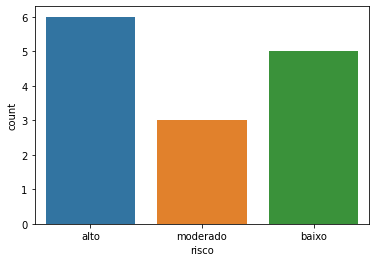

In [57]:
sns.countplot(x=base_risco_credito['risco']);

# Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

## Pré Processamento dos dados de Risco de Crédito

In [59]:
# Separando as variaveis da classe
X_risco_credito = base_risco_credito.iloc[:, 0:4].values

In [60]:
# Separando a classe das variaveis
y_risco_credito = base_risco_credito.iloc[:, 4].values

### Escalonamento dos valores

In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [62]:
X_risco_credito[:, 0] = label_encoder_historia.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:, 1] = label_encoder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = label_encoder_garantia.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = label_encoder_renda.fit_transform(X_risco_credito[:, 3])

In [63]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [64]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([X_risco_credito, y_risco_credito], f)

In [65]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [66]:
# Valores utilizados para testar se o algoritmo está correto
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [67]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [68]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [69]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [70]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

In [71]:
# Note-se que, por ser uma base pequena, não foi necessário criar uma divisão entre base de treinamento e teste,
# Pois isso poderia influenciar diretamente nos resultados, por causa da baixa quantidade de dados passados.

# Árvores de Decisão

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [74]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [75]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [76]:
arvore_risco_credito.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

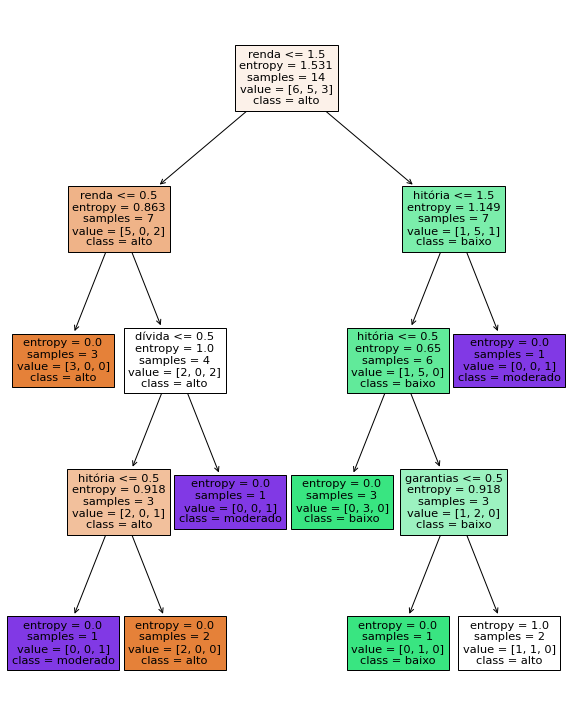

In [77]:
from sklearn import tree
previsores = ['hitória', 'dívida', 'garantias', 'renda']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,13))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True);

In [78]:
# Testes de Validação
# história boa, dívida alta, garatias nenhuma, renda > 35
# história ruim, dívida alta, garatias adequada, renda < 15
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

# OneR and PRISM Algoritm

In [79]:
import Orange

In [80]:
base_risco_credito_orange = Orange.data.Table(r'C:\Users\brcalazans\Desktop\Pessoal\Machine Learning e Data Science\Bases de dados\risco_credito_regras.csv')

In [81]:
base_risco_credito_orange

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [82]:
base_risco_credito_orange.domain

[historia, divida, garantias, renda | risco]

In [83]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito_orange)

In [84]:
for regras in regras_risco_credito.rule_list:
    print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=baixo 
IF TRUE THEN risco=alto 


In [85]:
#Realizando validações no algoritmo
# 1° Ex - História boa, dívida alta, garantias nenhuma, renda > 35
# 2° Ex - História ruim, dívida alta, garantias adequada, renda < 15

In [86]:
previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15']])

In [87]:
previsoes

array([1, 0], dtype=int64)

In [88]:
base_risco_credito_orange.domain.class_var.values

('alto', 'baixo', 'moderado')

In [89]:
for i in previsoes:
    print(base_risco_credito_orange.domain.class_var.values[i])

baixo
alto


# Regressão Logística

In [96]:
from sklearn.linear_model import LogisticRegression

In [90]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [91]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [92]:
# Para esse estudo, usaremos apenas duas classes: 'Alto' e 'Baixo'

In [93]:
X_risco_credito = np.delete(X_risco_credito, [2,7,11], axis=0)
y_risco_credito = np.delete(y_risco_credito, [2,7, 11], axis=0)

In [94]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [95]:
y_risco_credito

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [97]:
logistic_risco_credit = LogisticRegression(random_state=1)
logistic_risco_credit.fit(X_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [99]:
logistic_risco_credit.intercept_

array([-0.80828993])

In [100]:
logistic_risco_credit.coef_

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [101]:
#Realizando validações no algoritmo
# 1° Ex - História boa, dívida alta, garantias nenhuma, renda > 35
# 2° Ex - História ruim, dívida alta, garantias adequada, renda < 15

In [102]:
previsoes_logistic_regression = logistic_risco_credit.predict([[0,0,1,2], [2,0,0,0]])

In [103]:
previsoes_logistic_regression

array(['baixo', 'alto'], dtype=object)